In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
from datetime import datetime
import scipy.optimize
import datashader as ds
import colorcet as cc
from sklearn.cluster import KMeans, MiniBatchKMeans
import holoviews as hv
from holoviews import opts
from holoviews.element.tiles import StamenTerrain
import holoviews.operation.datashader as hd
from IPython.display import Image

In [2]:
# import Data

df = pd.read_csv('/Users/ebrahimfarahani/Documents/tapsi data/demandserver.csv')

## Cancellation Rate - Pickup Time during a Day

In [25]:
df['canceled'] = 1 - df['keep']
df['hour'] = df['h']

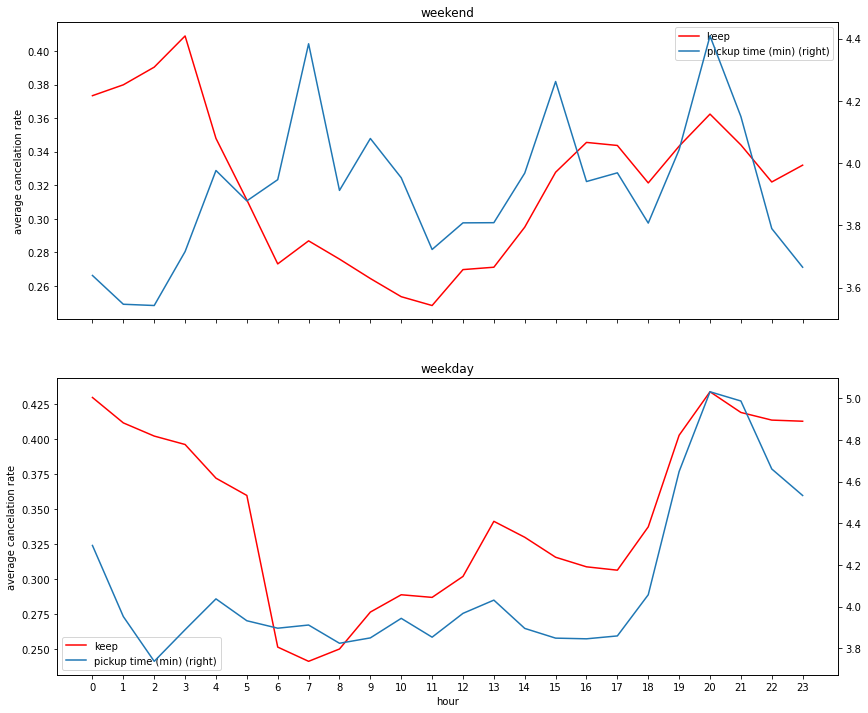

In [26]:
fig, axes = plt.subplots(2, sharex=True,figsize=(14,12))

for key, value in {'weekend':0, 'weekday':1}.items():
    
    df[df.weekend==value].groupby('hour')['canceled'].mean().plot(kind='line', legend=True,
                        ax=axes[value],c='r',  label='keep',xticks=np.arange(0,24,1),
                                ylabel="average cancelation rate")
    df[df.weekend==value].groupby('hour')['driverETA'].mean().plot(kind='line',secondary_y=True,legend=True,
                        ax=axes[value],label='pickup time (min)',xticks=np.arange(0,24,1),
                      )
    plt.title('{}'.format(key))
 



## Subsidy Rate Box Plot for Rider during Day

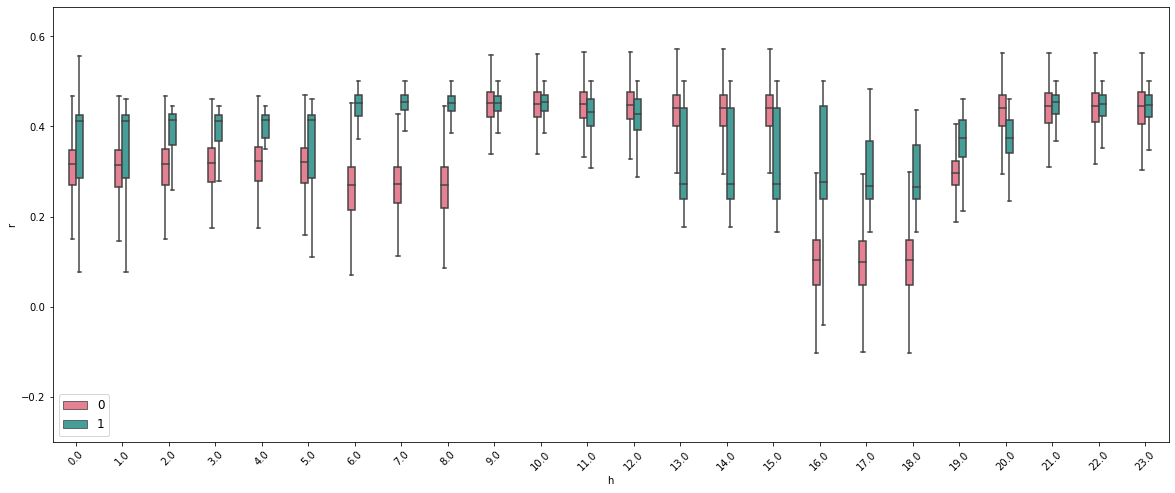

In [96]:
df['subsidy_rate'] = df['r']
fig, ax = plt.subplots(figsize=(20,8))
plt.xticks(rotation = 45)
ax = sns.boxplot(x="hour", y="subsidy_rate", hue="weekend",  color=".25",  data=df, palette="husl",fliersize=0, width=.3)
ax.set_ylim(-.3, None)
plt.legend(fontsize='large', loc='lower left')
